In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91944\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re


In [8]:
data=pd.read_csv(r"C:\Users\91944\Downloads\amazon_alexa.tsv",delimiter='\t',quoting=3)
print(f"data shape :{data.shape}")

data shape :(3150, 5)


In [9]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [10]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [11]:
data[data['verified_reviews'].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [12]:
data.dropna(inplace=True)

In [13]:
print(f"shape{data.shape}")

shape(3149, 5)


In [15]:
data["length"]=data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [19]:
print(f"'verified column values' column values:{data.iloc[10]['verified_reviews']}")
print(f"'verified column values' column Length:{len(data.iloc[10]['verified_reviews'])}")
print(f"'Length' column values:{data.iloc[10]['length']}")



'verified column values' column values:"I sent it to my 85 year old Dad, and he talks to it constantly."
'verified column values' column Length:65
'Length' column values:65


In [20]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [21]:
print(f"rating value counts : \n{data['rating'].value_counts()}")

rating value counts : 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


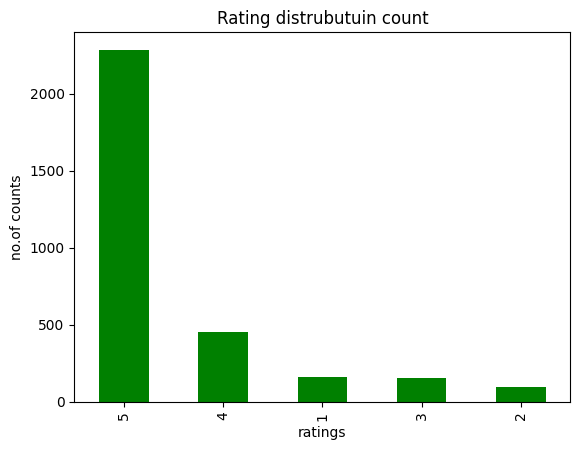

In [24]:
data['rating'].value_counts().plot.bar(color='green')
plt.title('Rating distrubutuin count')
plt.xlabel('ratings')
plt.ylabel('no.of counts')
plt.show()

In [27]:
print(f"rating count percentage distrubution :\n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

rating count percentage distrubution :
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


TypeError: descriptor 'write' for '_io.BytesIO' objects doesn't apply to a 'bytes' object

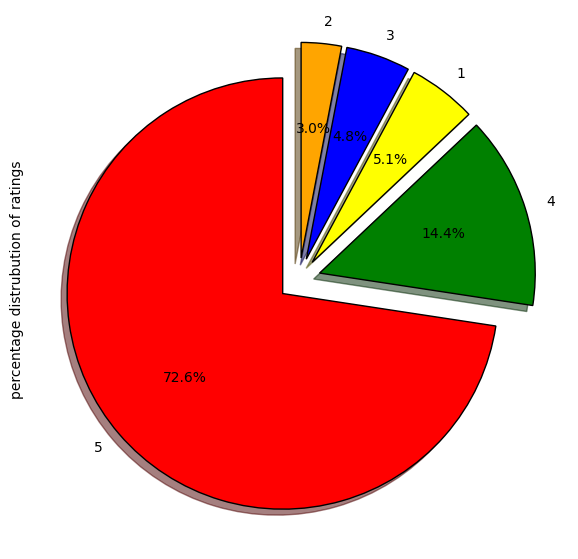

In [28]:
fig=plt.figure(figsize=(7,7))
colors = ('red','green','yellow','blue','orange')
wp={'linewidth':1,"edgecolor":'black'}
tags=data['rating'].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie',autopct="%1.1f%%",shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='percentage distrubution of ratings')
from io import BytesIO
graph=BytesIO
fig.savefig(graph,format="png")

In [46]:
print(f"counts of feedback \n{data['feedback'].value_counts()}")

counts of feedback 
feedback
1    2893
0     256
Name: count, dtype: int64


In [53]:
review_0=data[data['feedback']==0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [55]:
review_1=data[data['feedback']==1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


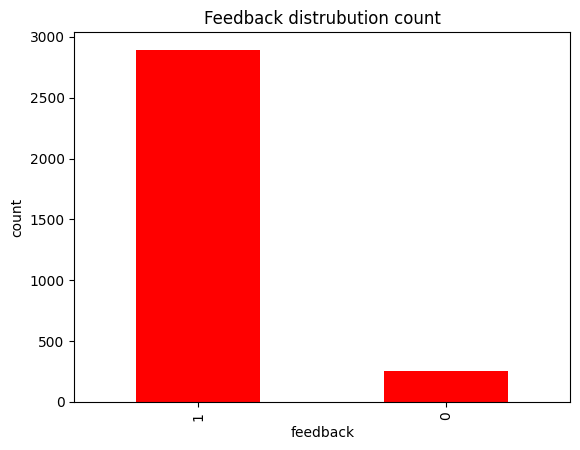

In [56]:
data['feedback'].value_counts().plot.bar(color='red')
plt.title('Feedback distrubution count')
plt.xlabel('feedback')
plt.ylabel('count')
plt.show()

In [57]:
print(f"feedback count percentage distrubution :\n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

feedback count percentage distrubution :
feedback
1    91.87
0     8.13
Name: count, dtype: float64


<Axes: ylabel='Percentage distrubution of feedback'>

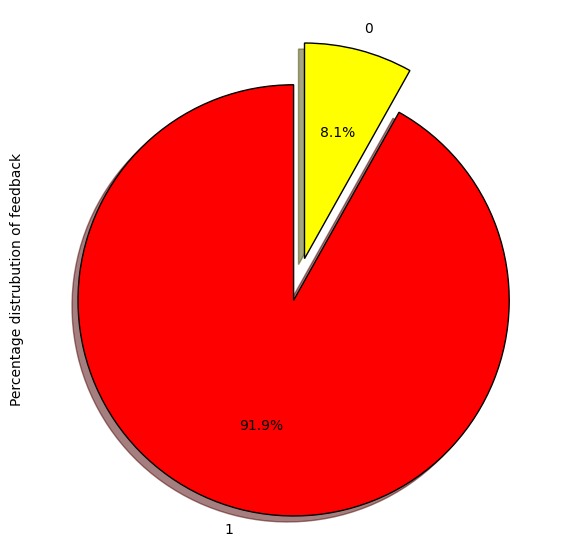

In [59]:
fig=plt.figure(figsize=(7,7))
colors=('red','yellow')
wp={'linewidth':1,"edgecolor":'black'}
tags=data['feedback'].value_counts()/data.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='Percentage distrubution of feedback')